## Task 1 :Investigate and analyze price data

You are a quantitative researcher working with a commodity trading desk. Alex, a VP on the desk, wants to start trading natural gas storage contracts. However, the available market data must be of higher quality to enable the instrument to be priced accurately. They have sent you an email asking you to help extrapolate the data available from external feeds to provide more granularity, considering seasonal trends in the price as it relates to months in the year. To price the contract, we will need historical data and an estimate of the future gas price at any date.

Commodity storage contracts represent deals between warehouse (storage) owners and participants in the supply chain (refineries, transporters, distributors, etc.). The deal is typically an agreement to store an agreed quantity of any physical commodity (oil, natural gas, agriculture) in a warehouse for a specified amount of time. The key terms of such contracts (e.g., periodic fees for storage, limits on withdrawals/injections of a commodity) are agreed upon inception of the contract between the warehouse owner and the client. The injection date is when the commodity is purchased and stored, and the withdrawal date is when the commodity is withdrawn from storage and sold. 

A client could be anyone who would fall within the commodities supply chain, such as producers, refiners, transporters, and distributors. This group would also include firms (commodities trading, hedge funds, etc.) whose primary aim is to take advantage of seasonal or intra-day price differentials in physical commodities. For example, if a firm is looking to buy physical natural gas during summer and sell it in winter, it would take advantage of the seasonal price differential mentioned above. The firm would need to leverage the services of an underground storage facility to store the purchased inventory to realize any profits from this strategy.

After asking around for the source of the existing data, you learn that the current process is to take a monthly snapshot of prices from a market data provider, which represents the market price of natural gas delivered at the end of each calendar month. This data is available for roughly the next 18 months and is combined with historical prices in a time series database. After gaining access, you are able to download the data in a CSV file.

You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.

Download the monthly natural gas price data.
Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
Your code should take a date as input and return a price estimate.
Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your completed code below.

Note: This role often requires the knowledge and utilization of data analysis and machine learning. Python is a useful tool and one that JPMorgan Chase uses a lot in quantitative research since it’s capable of completing complex tasks.

Moving forward in this program, the example answers are given in Python code. (If Python is not downloaded on your system, you can execute Python code in Jupyter Notebook online for free.)

In [1]:
# Data handling
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [2]:

data = pd.read_csv("Nat_Gas.csv")

data['Dates']  = pd.to_datetime(data['Dates'], format="mixed")


In [3]:
data.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


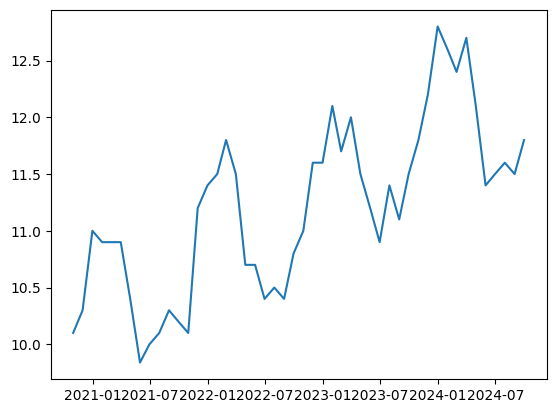

In [4]:
plt.plot(data['Dates'], data['Prices'] )

In [5]:
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month
data.head()

,Dates,Prices,Year,Month
0,2020-10-31,10.1,2020,10
1,2020-11-30,10.3,2020,11
2,2020-12-31,11.0,2020,12
3,2021-01-31,10.9,2021,1
4,2021-02-28,10.9,2021,2


In [6]:
data.tail()

,Dates,Prices,Year,Month
43,2024-05-31,11.4,2024,5
44,2024-06-30,11.5,2024,6
45,2024-07-31,11.6,2024,7
46,2024-08-31,11.5,2024,8
47,2024-09-30,11.8,2024,9


In [7]:
last_month = data['Month'].iloc[-1]
last_year = data['Year'].iloc[-1]
last_date = data['Dates'].iloc[-1]
last_month, last_year, last_date

(9, 2024, Timestamp('2024-09-30 00:00:00'))

In [8]:
new_date_list = pd.date_range(start=last_date + relativedelta(months=1), end=last_date + relativedelta(months=13), freq='M')

In [9]:
from sklearn.linear_model import LinearRegression


def next_year_price():
    """Return predicted price for each month in following year"""
    price_list = []
        
    for date in new_date_list:
        iMonth = date.month
        iYear = date.year
        X = np.array(data[data['Month'] == iMonth]['Year']).reshape(-1, 1)
        y = np.array(data[data['Month'] == iMonth]['Prices'])
        reg = LinearRegression().fit(X, y)
        price = reg.predict([[iYear]])
        price_list.append(round(price[0], 2))
        
    return price_list
    

In [10]:
gas_price2025 = next_year_price()
np.array(gas_price2025)

array([12.25, 12.85, 13.1 , 13.2 , 12.8 , 13.25, 12.65, 12.08, 11.95,
       12.25, 11.9 , 12.45])

In [11]:
data_2025 = pd.DataFrame({'Dates' : new_date_list, 'Prices' : gas_price2025})

data_2025['Dates'] = pd.to_datetime(data_2025['Dates'])

data_2025['Year'] = data_2025['Dates'].dt.year
data_2025['Month'] = data_2025['Dates'].dt.month
data_2025.head()

,Dates,Prices,Year,Month
0,2024-10-31,12.25,2024,10
1,2024-11-30,12.85,2024,11
2,2024-12-31,13.10,2024,12
3,2025-01-31,13.20,2025,1
4,2025-02-28,12.80,2025,2


In [12]:
new_data = pd.concat([data, data_2025], ignore_index = True)

In [13]:
def get_price(month, year):
    print(new_data[(new_data['Year'] == year) & (new_data['Month'] == month)]['Prices'])

In [14]:
get_price(8, 2025)

58    11.9
Name: Prices, dtype: float64


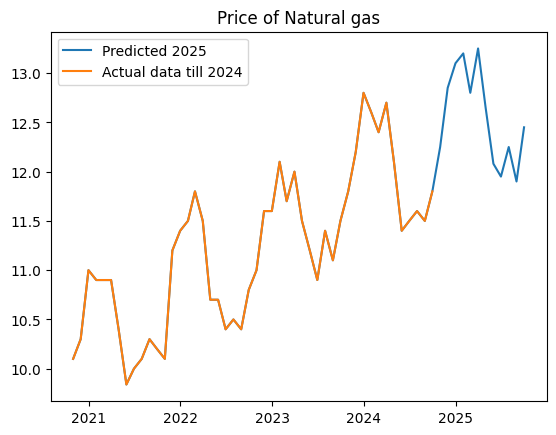

In [15]:
plt.plot(new_data['Dates'], new_data['Prices'], label='Predicted 2025')
plt.plot(data['Dates'], data['Prices'], label='Actual data till 2024')
plt.title('Price of Natural gas')
plt.legend()


In [16]:
new_data['Prices'] = new_data['Prices'].interpolate(method='polynomial', order=2)


In [17]:
new_data.tail()

,Dates,Prices,Year,Month
55,2025-05-31,12.08,2025,5
56,2025-06-30,11.95,2025,6
57,2025-07-31,12.25,2025,7
58,2025-08-31,11.90,2025,8
59,2025-09-30,12.45,2025,9


In [18]:
def get_price(date):
    print('Estimated price of Natural gas for ' + date + ' = $' , new_data[new_data['Dates'] == date]['Prices'])


In [19]:
get_price('2025-05-31')

Estimated price of Natural gas for 2025-05-31 = $ 55    12.08
Name: Prices, dtype: float64
